# IE 582 - MERT ÇETİNKAYA - 2018702012 - HOMEWORK1

# Task 1

In [1]:
#The files are read.
bets=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week3/hw1/data/bets.csv', header=TRUE, sep=",")
booking=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week3/hw1/data/booking.csv', header=TRUE, sep=",")
goals=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week3/hw1/data/goals.csv', header=TRUE, sep=",")
matches=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week3/hw1/data/matches.csv', header=TRUE, sep=",")
stats=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week3/hw1/data/stats.csv', header=TRUE, sep=",")

In [2]:
#Premier League matches are selected.
matches_pr=matches[matches$league_id==148 & matches$match_status=='Finished',] 

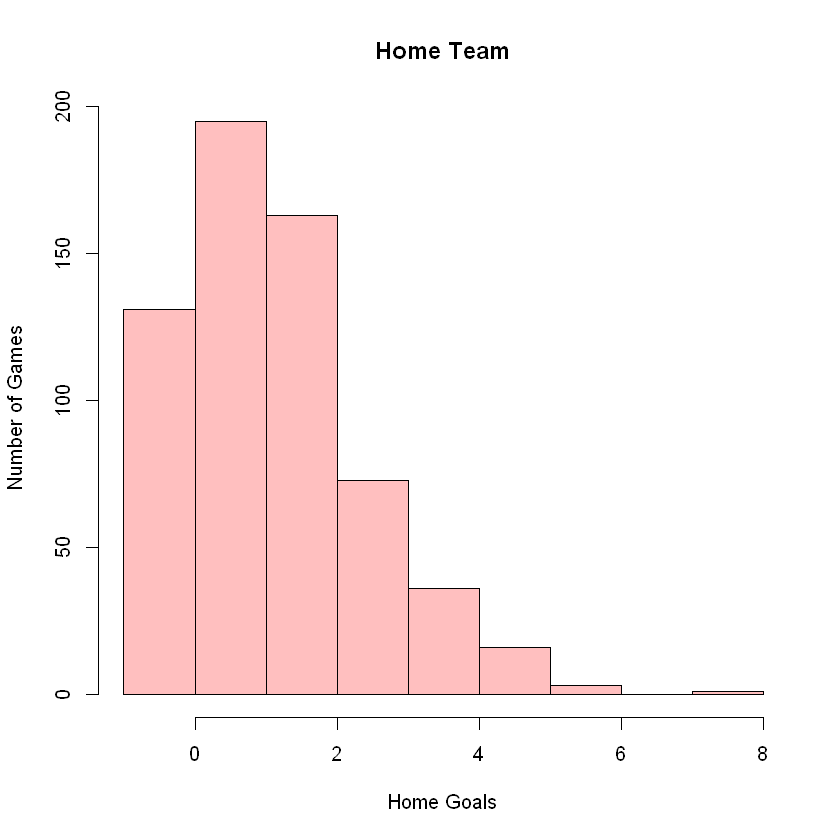

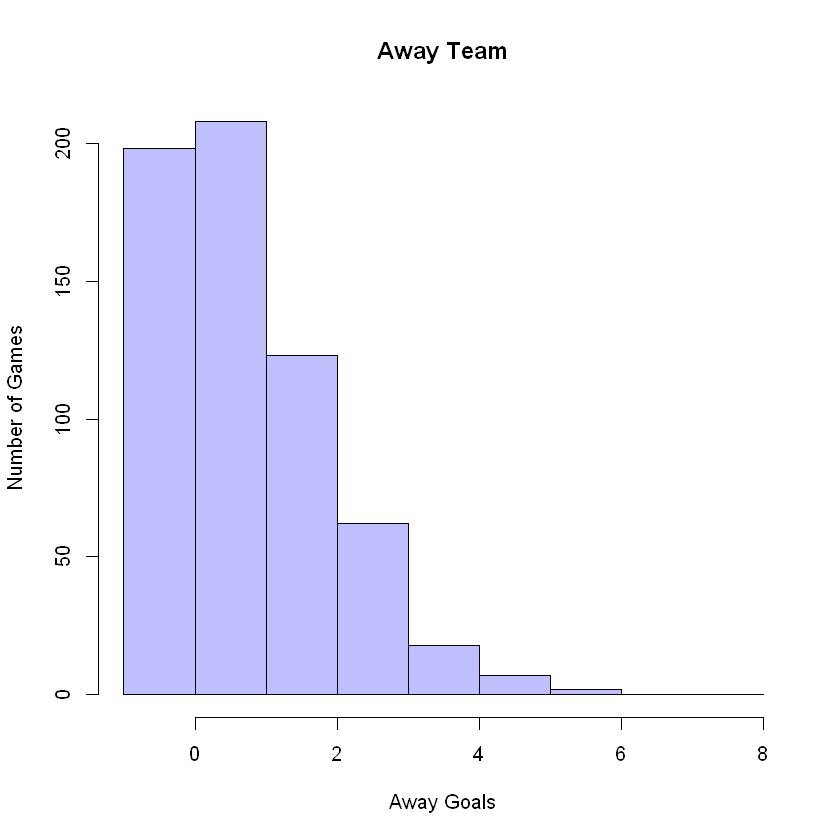

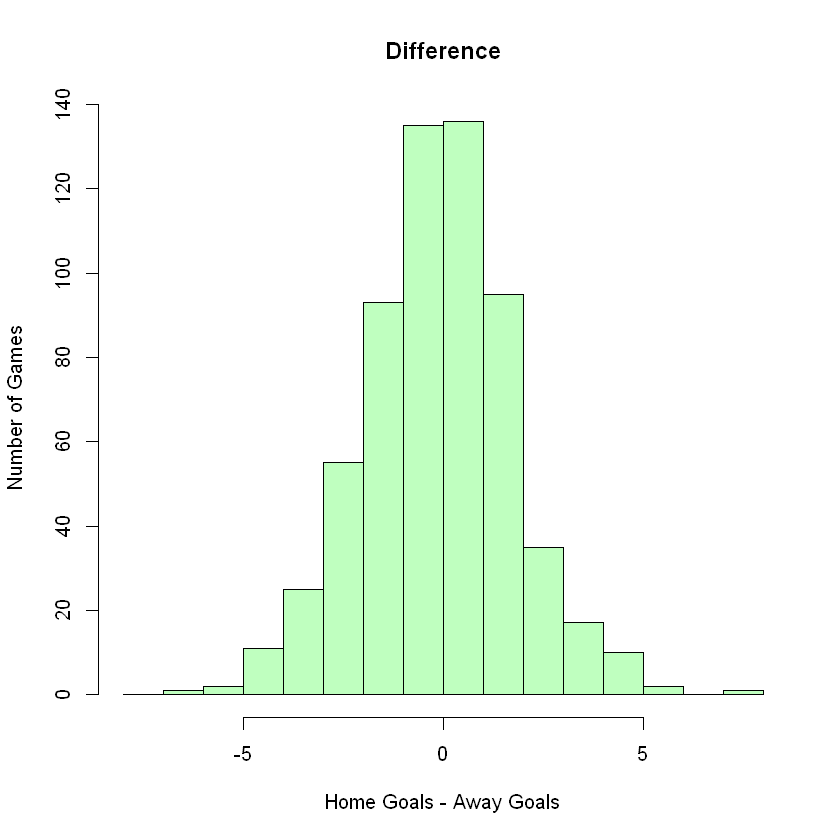

In [3]:
#Histograms are plotted.
hist(matches_pr$match_hometeam_score,, col=rgb(1,0,0,1/4),main='Home Team',ylab = 'Number of Games',xlab='Home Goals',breaks=seq(-1,8,1))
hist(matches_pr$match_awayteam_score,, col=rgb(0,0,1,1/4),main='Away Team',ylab = 'Number of Games',xlab='Away Goals',breaks=seq(-1,8,1))
hist(matches_pr$match_hometeam_score - matches_pr$match_awayteam_score, col=rgb(0,1,0,1/4),main='Difference',ylab = 'Number of Games',xlab='Home Goals - Away Goals',breaks=seq(-8,8,1))


In [4]:
#Score numbers and match numbers are found for home and away teams.
t1=as.data.frame(table(matches_pr$match_hometeam_score))
colnames(t1)=c('hometeam_score','frequence')
t1
t2=as.data.frame(table(matches_pr$match_awayteam_score))
colnames(t2)=c('awayteam_score','frequence')
t2

hometeam_score,frequence
0,131
1,195
2,163
3,73
4,36
5,16
6,3
8,1


awayteam_score,frequence
0,198
1,208
2,123
3,62
4,18
5,7
6,2


In [5]:
#Expected score value in a match is calculated for home and away teams. This is a very simple average calculation.
#Number of total goals is divided by number of matches for home and away teams.
#This value becomes lambda of poisson distribution.
hometeam_expected_score=sum(as.numeric(as.character(t1[,1])) * as.numeric(as.character(t1[,2]))) / sum(as.numeric(as.character(t1[,2])))
awayteam_expected_score=sum(as.numeric(as.character(t2[,1])) * as.numeric(as.character(t2[,2]))) / sum(as.numeric(as.character(t2[,2])))
print(paste("Expected score value for home team is",round(hometeam_expected_score,3)))
print(paste("Expected score value for away team is",round(awayteam_expected_score,3)))

[1] "Expected score value for home team is 1.602"
[1] "Expected score value for away team is 1.228"


In [6]:
#The match number is found.
hometeam_score_available=nrow(matches_pr[is.na(matches_pr$match_hometeam_score)==FALSE,])
awayteam_score_available=nrow(matches_pr[is.na(matches_pr$match_awayteam_score)==FALSE,])
print(paste('Home score number is applicable in',hometeam_score_available,'matches and Away score number is applicable in', awayteam_score_available ,'matches.'))

[1] "Home score number is applicable in 618 matches and Away score number is applicable in 618 matches."


In [7]:
#Expected score number and expected match number for this score number are found with poisson distribution
#for home and away teams. We see that these numbers are similar and consistent with the real numbers found above.
array=vector()
for (i in 0:8){
    array=c(array,round(hometeam_score_available*dpois(x=i,lambda=hometeam_expected_score),0))
}
home_team=data.frame(0:8,array)
colnames(home_team)=c('hometeam_score','expected_frequence')
home_team
array=vector()
for (i in 0:8){
    array=c(array,round(awayteam_score_available*dpois(x=i,lambda=awayteam_expected_score),0))
}
away_team=data.frame(0:8,array)
colnames(away_team)=c('awayteam_score','expected_frequence')
away_team

hometeam_score,expected_frequence
0,125
1,199
2,160
3,85
4,34
5,11
6,3
7,1
8,0


awayteam_score,expected_frequence
0,181
1,222
2,136
3,56
4,17
5,4
6,1
7,0
8,0


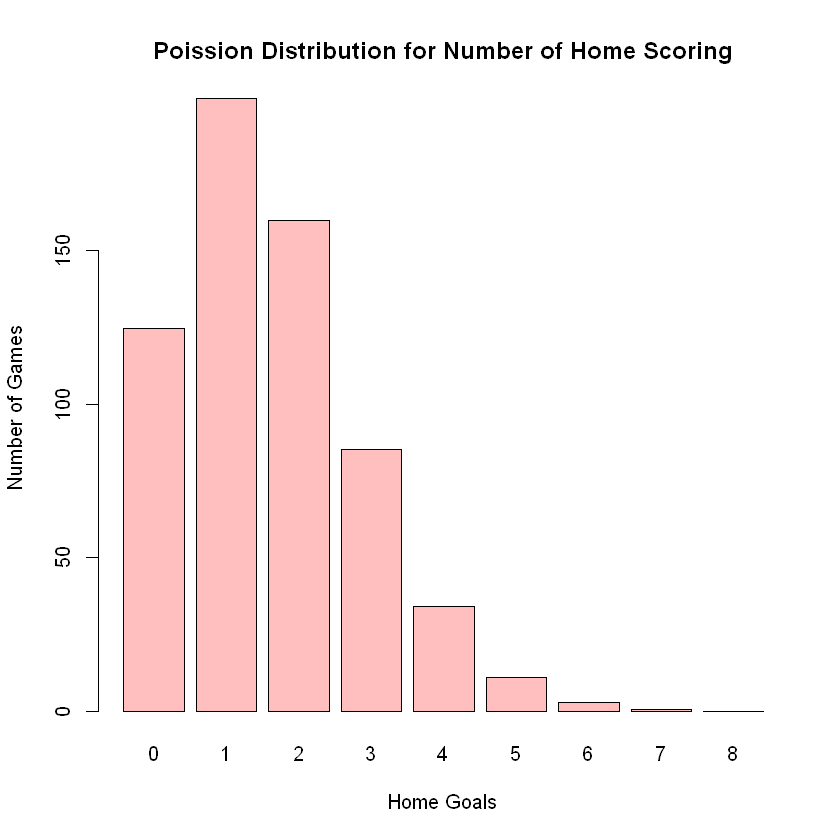

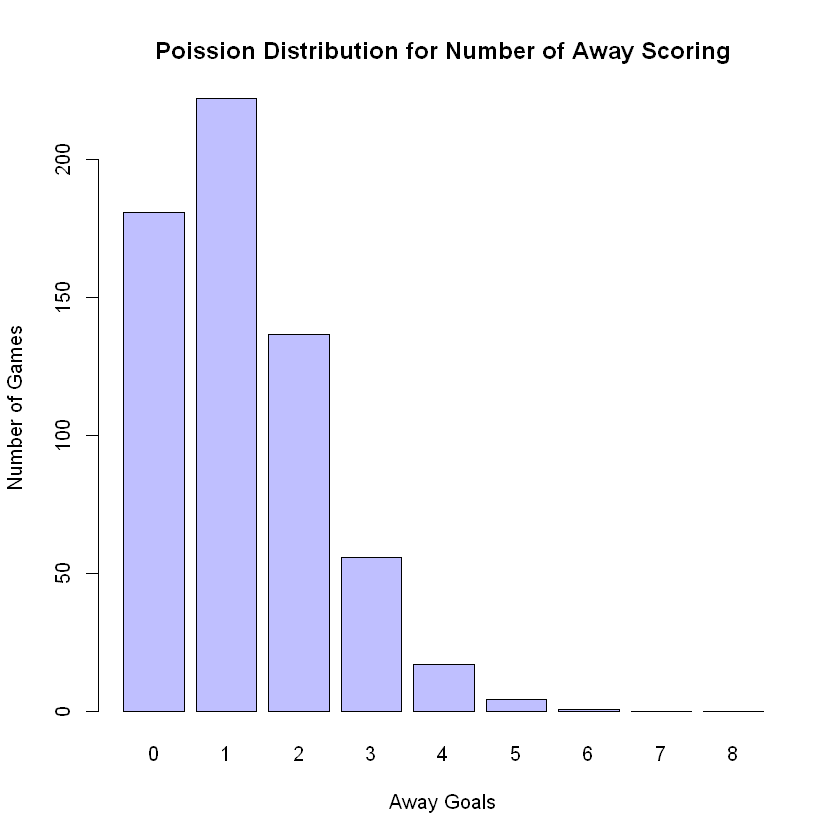

In [8]:
#The bar plots are drawn for the numbers found in the previous cell with poisson distribution. These plots are also close to
#histograms found before according to the real score numbers.
#As a result, we can say that home and away goals are consistent with poisson distribution.
x = 0:8;  pdf = hometeam_score_available*dpois(x, hometeam_expected_score)
barplot(pdf,names.arg = x,col=rgb(1,0,0,1/4),main='Poission Distribution for Number of Home Scoring',xlab = 'Home Goals',ylab = 'Number of Games')
x = 0:8;  pdf = awayteam_score_available*dpois(x, awayteam_expected_score)
barplot(pdf,names.arg = x,col=rgb(0,0,1,1/4),main='Poission Distribution for Number of Away Scoring',xlab = 'Away Goals',ylab = 'Number of Games')

# Task 2

In [9]:
#bets and matches tables are merged and Premier League matches are selected from the merged table.
bets_matches=merge(x=bets,y=matches,by='match_id',all.x=TRUE)
bets_matches_pr=bets_matches[bets_matches$league_id==148 & bets_matches$match_status=='Finished',] 

In [10]:
#We see the bookmakers below. I select Titanbet, ComeOn, Jetbull, NordicBet as my bookmakers.
unique(bets_matches_pr$odd_bookmakers) 

[1] Marathonbet    1xBet          bwin           bet365         Interwetten.es
  [6] PaddyPower.it  Luxbet         Expekt         Intertops      Superbahis    
 [11] Leonbets       Tipico.it      18bet          bet365.it      Coral         
 [16] bet-at-home    VonBets        BoyleSports    Tipico         Tipsport.cz   
 [21] 188BET         Oddsring       Betfred        MrRingo        888sport      
 [26] Interwetten    Winline.ru     BetVictor      Betway         Tempobet      
 [31] youwin         Tipbet         Sportingbet    Pinnacle       5Dimes        
 [36] Unibet.it      Winner         Betclic        Unibet         iFortuna.sk   
 [41] mybet          Tipsport.sk    BetOlimp       Island Casino  Titanbet      
 [46] Vernons        BetEast        SBOBET         Chance.cz      Betclic.it    
 [51] BetOnline      William Hill   iFortuna.cz    TonyBet        Vulkanbet     
 [56] WilliamHill.it Sekabet        RealDealBet    Ladbrokes      10Bet         
 [61] Jojobet        ComeOn         Bethard        Betrally       Unibet.fr     
 [66] BetGun         bwin.es        bwin.fr        France Pari    bwin.it       
 [71] Jetbull        Bestbet        Noxwin         NordicBet      Betsson       
 [76] Betsafe        betcart        DOXXbet        Guts           Sportium      
 [81] Betfair        Asianodds      22Bet          SAZKAbet.cz    BetJOE        
 [86] Coolbet        Sportium.es    Planetwin      Planetwin365   Kto.com       
 [91] KTO            STS.pl         Babibet        Marsbet        Betcruise     
 [96] ScandiBet      Betser         Dotabet        Winline        Bovada        
[101] MrGreen        Betago         BetCity       
103 Levels: 10Bet 188BET 18bet 1xBet 22Bet 5Dimes 888sport Asianodds ... youwin

In [11]:
#Let's look at the first rows of our merged table.
head(bets_matches_pr)

,match_id,odd_bookmakers,odd_epoch,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id
2462,150842,Marathonbet,1486711421,odd_2,1.75,2612,2616,1541942100,Finished,0,...,Everton,0,0,0,0,0,0,NA,NA,148
2463,150842,1xBet,1486711421,odd_x,3.7,2612,2616,1541942100,Finished,0,...,Everton,0,0,0,0,0,0,NA,NA,148
2464,150842,Marathonbet,1486711421,odd_x,3.7,2612,2616,1541942100,Finished,0,...,Everton,0,0,0,0,0,0,NA,NA,148
2465,150842,1xBet,1486711421,odd_2,1.77,2612,2616,1541942100,Finished,0,...,Everton,0,0,0,0,0,0,NA,NA,148
2466,150842,1xBet,1486711421,odd_1,5.1,2612,2616,1541942100,Finished,0,...,Everton,0,0,0,0,0,0,NA,NA,148
2467,150842,Marathonbet,1486711421,odd_1,5.2,2612,2616,1541942100,Finished,0,...,Everton,0,0,0,0,0,0,NA,NA,148


In [12]:
#The rows with Titanbet are selected from our merged table.
bets_matches_pr_titanbet=bets_matches_pr[bets_matches_pr$odd_bookmakers=='Titanbet',]

In [13]:
#Variables with odd_1, odd_x and odd_2 are selected and simple probability values are assigned to the table for these variables.
#Also, first rows of our new table are printed.
bets_matches_pr_titanbet=bets_matches_pr_titanbet[bets_matches_pr_titanbet$variable=='odd_1'  | bets_matches_pr_titanbet$variable=='odd_x' | bets_matches_pr_titanbet$variable=='odd_2' ,]
bets_matches_pr_titanbet$variable_probability=1/(as.numeric(as.character(bets_matches_pr_titanbet$value)))
head(bets_matches_pr_titanbet)


,match_id,odd_bookmakers,odd_epoch,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,variable_probability
12378,156845,Titanbet,1489826601,odd_x,3,2629,2619,1543672800,Finished,0,...,2,0,1,0,1,0,NA,NA,148,0.3333333
12500,156845,Titanbet,1489826601,odd_2,3.35,2629,2619,1543672800,Finished,0,...,2,0,1,0,1,0,NA,NA,148,0.2985075
12540,156845,Titanbet,1489826601,odd_1,2.25,2629,2619,1543672800,Finished,0,...,2,0,1,0,1,0,NA,NA,148,0.4444444
13348,156847,Titanbet,1489911773,odd_x,3.45,2623,2611,1543672800,Finished,0,...,2,0,2,0,2,0,NA,NA,148,0.2898551
13367,156847,Titanbet,1489911773,odd_1,1.67,2623,2611,1543672800,Finished,0,...,2,0,2,0,2,0,NA,NA,148,0.5988024
13705,156847,Titanbet,1489911773,odd_2,5.25,2623,2611,1543672800,Finished,0,...,2,0,2,0,2,0,NA,NA,148,0.1904762


In [14]:
#Sum of variable probabilities are found for each match_id - odd_epoch pair and first rows of the table are printed.
#This table is merged with the table above and first rows of the table are printed.
library(dplyr)
frame=bets_matches_pr_titanbet %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
head(frame)
bets_matches_pr_titanbet=merge(x=bets_matches_pr_titanbet,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
head(bets_matches_pr_titanbet)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



match_id,odd_epoch,sum_variable_probability
156845,1489826601,1.076285
156847,1489911773,1.079134
156848,1489911793,1.074074
156850,1489911812,1.073774
157536,1489848975,1.057741
157537,1489848995,1.065670


match_id,odd_epoch,odd_bookmakers,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,variable_probability,sum_variable_probability
156845,1489826601,Titanbet,odd_x,3,2629,2619,1543672800,Finished,0,...,0,1,0,1,0,NA,NA,148,0.3333333,1.076285
156845,1489826601,Titanbet,odd_2,3.35,2629,2619,1543672800,Finished,0,...,0,1,0,1,0,NA,NA,148,0.2985075,1.076285
156845,1489826601,Titanbet,odd_1,2.25,2629,2619,1543672800,Finished,0,...,0,1,0,1,0,NA,NA,148,0.4444444,1.076285
156847,1489911773,Titanbet,odd_x,3.45,2623,2611,1543672800,Finished,0,...,0,2,0,2,0,NA,NA,148,0.2898551,1.079134
156847,1489911773,Titanbet,odd_1,1.67,2623,2611,1543672800,Finished,0,...,0,2,0,2,0,NA,NA,148,0.5988024,1.079134
156847,1489911773,Titanbet,odd_2,5.25,2623,2611,1543672800,Finished,0,...,0,2,0,2,0,NA,NA,148,0.1904762,1.079134


In [15]:
#Using the new columns added normalised variable probabilities are found and added to the table.
#First rows of our table are printed.
bets_matches_pr_titanbet['normalised_variable_probability']=bets_matches_pr_titanbet['variable_probability'] * (1/bets_matches_pr_titanbet['sum_variable_probability'])
bets_matches_pr_titanbet_2=bets_matches_pr_titanbet
head(bets_matches_pr_titanbet_2)

match_id,odd_epoch,odd_bookmakers,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,variable_probability,sum_variable_probability,normalised_variable_probability
156845,1489826601,Titanbet,odd_x,3,2629,2619,1543672800,Finished,0,...,1,0,1,0,NA,NA,148,0.3333333,1.076285,0.3097072
156845,1489826601,Titanbet,odd_2,3.35,2629,2619,1543672800,Finished,0,...,1,0,1,0,NA,NA,148,0.2985075,1.076285,0.2773498
156845,1489826601,Titanbet,odd_1,2.25,2629,2619,1543672800,Finished,0,...,1,0,1,0,NA,NA,148,0.4444444,1.076285,0.4129430
156847,1489911773,Titanbet,odd_x,3.45,2623,2611,1543672800,Finished,0,...,2,0,2,0,NA,NA,148,0.2898551,1.079134,0.2685998
156847,1489911773,Titanbet,odd_1,1.67,2623,2611,1543672800,Finished,0,...,2,0,2,0,NA,NA,148,0.5988024,1.079134,0.5548918
156847,1489911773,Titanbet,odd_2,5.25,2623,2611,1543672800,Finished,0,...,2,0,2,0,NA,NA,148,0.1904762,1.079134,0.1765084


In [16]:
#We choose match_id, odd_epoch and normalised_variable_probability values for tie status, collect them in a table
#and print the first rows of this table.
bets_matches_pr_titanbet_2=bets_matches_pr_titanbet_2[bets_matches_pr_titanbet_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_titanbet_2)[3]='normalised_variable_t_probability'
head(bets_matches_pr_titanbet_2)

,match_id,odd_epoch,normalised_variable_t_probability
1,156845,1489826601,0.3097072
4,156847,1489911773,0.2685998
9,156848,1489911793,0.3103448
12,156850,1489911812,0.2865522
14,157536,1489848975,0.2780620
17,157537,1489848995,0.1787384


In [17]:
#Above table is merged to our big table (bets_matches_pr_titanbet) and first rows of the table are printed.
bets_matches_pr_titanbet=merge(x=bets_matches_pr_titanbet,y=bets_matches_pr_titanbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
head(bets_matches_pr_titanbet)

match_id,odd_epoch,odd_bookmakers,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,variable_probability,sum_variable_probability,normalised_variable_probability,normalised_variable_t_probability
156845,1489826601,Titanbet,odd_x,3,2629,2619,1543672800,Finished,0,...,0,1,0,NA,NA,148,0.3333333,1.076285,0.3097072,0.3097072
156845,1489826601,Titanbet,odd_2,3.35,2629,2619,1543672800,Finished,0,...,0,1,0,NA,NA,148,0.2985075,1.076285,0.2773498,0.3097072
156845,1489826601,Titanbet,odd_1,2.25,2629,2619,1543672800,Finished,0,...,0,1,0,NA,NA,148,0.4444444,1.076285,0.4129430,0.3097072
156847,1489911773,Titanbet,odd_x,3.45,2623,2611,1543672800,Finished,0,...,0,2,0,NA,NA,148,0.2898551,1.079134,0.2685998,0.2685998
156847,1489911773,Titanbet,odd_1,1.67,2623,2611,1543672800,Finished,0,...,0,2,0,NA,NA,148,0.5988024,1.079134,0.5548918,0.2685998
156847,1489911773,Titanbet,odd_2,5.25,2623,2611,1543672800,Finished,0,...,0,2,0,NA,NA,148,0.1904762,1.079134,0.1765084,0.2685998


In [18]:
#For each match_id - odd_epoch pair normalised variable probabilities for odd_1 and odd_2 are collected in a table
#and first rows of it are printed.
bets_matches_pr_titanbet_2=bets_matches_pr_titanbet[bets_matches_pr_titanbet$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_titanbet_3=bets_matches_pr_titanbet[bets_matches_pr_titanbet$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_titanbet_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_titanbet_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_titanbet_2=merge(x=bets_matches_pr_titanbet_2,y=bets_matches_pr_titanbet_3,by=c('match_id','odd_epoch'),all.x=TRUE)
head(bets_matches_pr_titanbet_2)

match_id,odd_epoch,variable1,normalised_variable_probability1,variable2,normalised_variable_probability2
156845,1489826601,odd_1,0.4129430,odd_2,0.27734977
156847,1489911773,odd_1,0.5548918,odd_2,0.17650843
156848,1489911793,odd_1,0.3448276,odd_2,0.34482759
156850,1489911812,odd_1,0.5173858,odd_2,0.19606200
157536,1489848975,odd_1,0.2822121,odd_2,0.43972590
157537,1489848995,odd_1,0.7274239,odd_2,0.09383768


In [19]:
#Difference between normalised variable probabilities of odd_1 and odd_2 from the above table is calculated and
#match_id, odd_epoch and diff columns are collected in a table. Then, first rows of this table and our big table are printed.
bets_matches_pr_titanbet_2['diff']=bets_matches_pr_titanbet_2['normalised_variable_probability1']-bets_matches_pr_titanbet_2['normalised_variable_probability2']
bets_matches_pr_titanbet_2=bets_matches_pr_titanbet_2[,c('match_id','odd_epoch','diff')]
head(bets_matches_pr_titanbet_2)
head(bets_matches_pr_titanbet)

match_id,odd_epoch,diff
156845,1489826601,0.1355932
156847,1489911773,0.3783833
156848,1489911793,0.0000000
156850,1489911812,0.3213238
157536,1489848975,-0.1575138
157537,1489848995,0.6335862


match_id,odd_epoch,odd_bookmakers,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,variable_probability,sum_variable_probability,normalised_variable_probability,normalised_variable_t_probability
156845,1489826601,Titanbet,odd_x,3,2629,2619,1543672800,Finished,0,...,0,1,0,NA,NA,148,0.3333333,1.076285,0.3097072,0.3097072
156845,1489826601,Titanbet,odd_2,3.35,2629,2619,1543672800,Finished,0,...,0,1,0,NA,NA,148,0.2985075,1.076285,0.2773498,0.3097072
156845,1489826601,Titanbet,odd_1,2.25,2629,2619,1543672800,Finished,0,...,0,1,0,NA,NA,148,0.4444444,1.076285,0.4129430,0.3097072
156847,1489911773,Titanbet,odd_x,3.45,2623,2611,1543672800,Finished,0,...,0,2,0,NA,NA,148,0.2898551,1.079134,0.2685998,0.2685998
156847,1489911773,Titanbet,odd_1,1.67,2623,2611,1543672800,Finished,0,...,0,2,0,NA,NA,148,0.5988024,1.079134,0.5548918,0.2685998
156847,1489911773,Titanbet,odd_2,5.25,2623,2611,1543672800,Finished,0,...,0,2,0,NA,NA,148,0.1904762,1.079134,0.1765084,0.2685998


In [20]:
#The 2 tables whose first rows are printed above are merged and first rows of this merged table are printed.
bets_matches_pr_titanbet=merge(x=bets_matches_pr_titanbet,y=bets_matches_pr_titanbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
head(bets_matches_pr_titanbet)

match_id,odd_epoch,odd_bookmakers,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,variable_probability,sum_variable_probability,normalised_variable_probability,normalised_variable_t_probability,diff
156845,1489826601,Titanbet,odd_x,3,2629,2619,1543672800,Finished,0,...,1,0,NA,NA,148,0.3333333,1.076285,0.3097072,0.3097072,0.1355932
156845,1489826601,Titanbet,odd_2,3.35,2629,2619,1543672800,Finished,0,...,1,0,NA,NA,148,0.2985075,1.076285,0.2773498,0.3097072,0.1355932
156845,1489826601,Titanbet,odd_1,2.25,2629,2619,1543672800,Finished,0,...,1,0,NA,NA,148,0.4444444,1.076285,0.4129430,0.3097072,0.1355932
156847,1489911773,Titanbet,odd_x,3.45,2623,2611,1543672800,Finished,0,...,2,0,NA,NA,148,0.2898551,1.079134,0.2685998,0.2685998,0.3783833
156847,1489911773,Titanbet,odd_1,1.67,2623,2611,1543672800,Finished,0,...,2,0,NA,NA,148,0.5988024,1.079134,0.5548918,0.2685998,0.3783833
156847,1489911773,Titanbet,odd_2,5.25,2623,2611,1543672800,Finished,0,...,2,0,NA,NA,148,0.1904762,1.079134,0.1765084,0.2685998,0.3783833


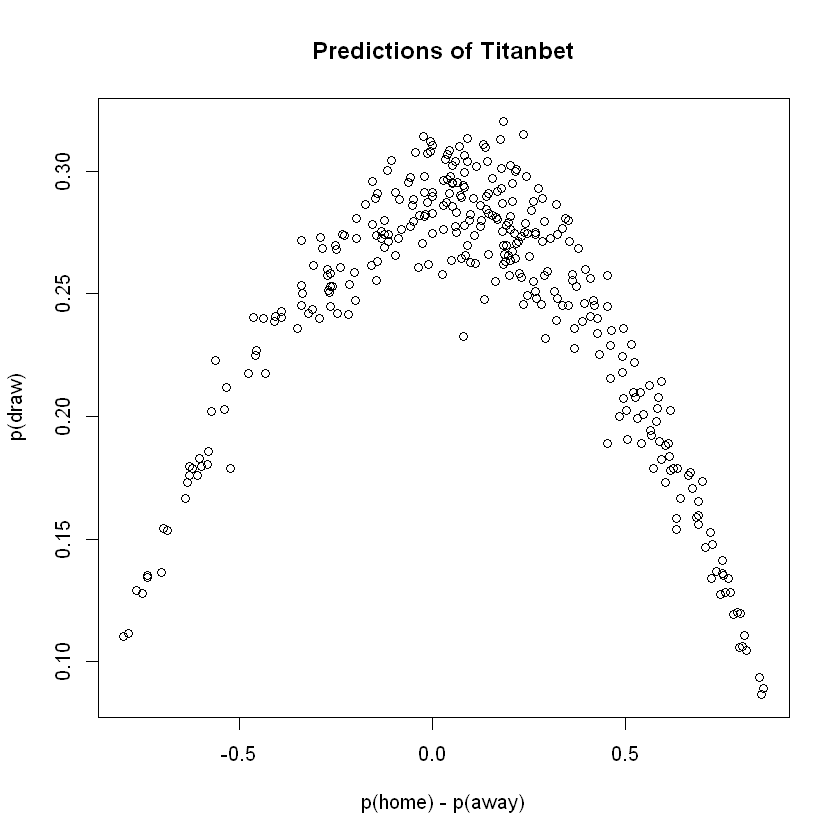

In [21]:
#We select match_id,odd_epoch, normalised tie probability and diff columns from the above merged table and 
#get the unique rows with regards to these 4 columns. Then we plot diff-normalised tie probability graph from this table
#which is obtained according to the predictions of Titanbet.
bets_matches_pr_titanbet_2=bets_matches_pr_titanbet[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_titanbet_2=unique(bets_matches_pr_titanbet_2)
plot(bets_matches_pr_titanbet_2[,4],bets_matches_pr_titanbet_2[,3],xlab = 'p(home) - p(away)',ylab='p(draw)', main='Predictions of Titanbet')

In [22]:
#A new column called bin is added to our big table and values between 1 and 10 are assigned to this column. If p(home)-p(away)
#which is diff column value is between -1 and -0.8, 1 value is assigned to the bin. If this value is between -0.8 and -0.6,
#2 value is assigned to the bin. The values are assigned according to this rule to bin column.
#Then, first rows of our big table are printed.
bets_matches_pr_titanbet['bin']=0
bets_matches_pr_titanbet$bin <- cut(bets_matches_pr_titanbet$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
head(bets_matches_pr_titanbet)

match_id,odd_epoch,odd_bookmakers,variable,value,match_awayteam_id,match_hometeam_id,epoch,match_status,match_live,...,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id,variable_probability,sum_variable_probability,normalised_variable_probability,normalised_variable_t_probability,diff,bin
156845,1489826601,Titanbet,odd_x,3,2629,2619,1543672800,Finished,0,...,0,NA,NA,148,0.3333333,1.076285,0.3097072,0.3097072,0.1355932,6
156845,1489826601,Titanbet,odd_2,3.35,2629,2619,1543672800,Finished,0,...,0,NA,NA,148,0.2985075,1.076285,0.2773498,0.3097072,0.1355932,6
156845,1489826601,Titanbet,odd_1,2.25,2629,2619,1543672800,Finished,0,...,0,NA,NA,148,0.4444444,1.076285,0.4129430,0.3097072,0.1355932,6
156847,1489911773,Titanbet,odd_x,3.45,2623,2611,1543672800,Finished,0,...,0,NA,NA,148,0.2898551,1.079134,0.2685998,0.2685998,0.3783833,7
156847,1489911773,Titanbet,odd_1,1.67,2623,2611,1543672800,Finished,0,...,0,NA,NA,148,0.5988024,1.079134,0.5548918,0.2685998,0.3783833,7
156847,1489911773,Titanbet,odd_2,5.25,2623,2611,1543672800,Finished,0,...,0,NA,NA,148,0.1904762,1.079134,0.1765084,0.2685998,0.3783833,7


In [23]:
#Some important columns are selected from our big table and collected in another table. Also, a new column called 
#draw is added to this table and 1 value assigned if the match is draw. Otherwise, 0 value is assigned for this column.
#First rows of this new table are printed as well.
bets_matches_pr_titanbet_3=bets_matches_pr_titanbet[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_titanbet_3['draw'] = 0
bets_matches_pr_titanbet_3['draw'] <- ifelse(bets_matches_pr_titanbet_3$match_hometeam_score == bets_matches_pr_titanbet_3$match_awayteam_score,1,0)
bets_matches_pr_titanbet_3=unique(bets_matches_pr_titanbet_3)
head(bets_matches_pr_titanbet_3)

,match_id,odd_epoch,match_hometeam_score,match_awayteam_score,normalised_variable_t_probability,diff,bin,draw
1,156845,1489826601,2,0,0.3097072,0.1355932,6,0
4,156847,1489911773,2,0,0.2685998,0.3783833,7,0
7,156848,1489911793,3,1,0.3103448,0.0000000,5,0
10,156850,1489911812,2,2,0.2865522,0.3213238,7,1
13,157536,1489848975,4,2,0.2780620,-0.1575138,5,0
16,157537,1489848995,1,0,0.1787384,0.6335862,9,0


In [24]:
#Number of matches and draw number for each bin are found. Then draw probability for each bin is calculated and the frame
#is printed. At the end, bin and draw probability information for each bin are collected for this frame.
bets_matches_pr_titanbet_3=na.omit(bets_matches_pr_titanbet_3)
frame=bets_matches_pr_titanbet_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame
frame=frame[,c(1,4)]

bin,count,draw,draw_probability
1,1,0,0.00000000
2,15,1,0.06666667
3,16,2,0.12500000
4,33,7,0.21212121
5,52,14,0.26923077
6,80,23,0.28750000
7,61,13,0.21311475
8,43,8,0.18604651
9,40,5,0.12500000
10,6,1,0.16666667


In [25]:
#Some useful columns from our big bets_matches_pr_titanbet table are selected and assigned in a new table.
#First rows of this table are printed and unique values from this table are selected.
bets_matches_pr_titanbet_4=bets_matches_pr_titanbet
bets_matches_pr_titanbet_4=bets_matches_pr_titanbet_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
head(bets_matches_pr_titanbet_4)
bets_matches_pr_titanbet_4=unique(bets_matches_pr_titanbet_4)

match_id,odd_epoch,bin,normalised_variable_t_probability
156845,1489826601,6,0.3097072
156845,1489826601,6,0.3097072
156845,1489826601,6,0.3097072
156847,1489911773,7,0.2685998
156847,1489911773,7,0.2685998
156847,1489911773,7,0.2685998


In [26]:
#For each bin, draw probability, min. draw probability and max. draw probability is calculated. These values are all obtained
#from normalised draw probabilities proposed by Titanbet for the related bin. While calculating the draw probability,
#simply, the mean of the draw probabilities in that bin is found or while calculating the min. draw probability, minimum of the
#draw probabilities found by Titanbet in that bin is used. Then, this frame is printed.
frame2=bets_matches_pr_titanbet_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
frame2

bin,draw_probability,min_draw_probability,max_draw_probability
1,0.11034581,0.11034581,0.1103458
2,0.15431308,0.11148903,0.1827411
3,0.21315026,0.17880350,0.2408759
4,0.25402992,0.23567968,0.2741652
5,0.28384517,0.25535863,0.3140006
6,0.28447006,0.23257635,0.3202900
7,0.26772936,0.22784810,0.3150560
8,0.21339434,0.17892644,0.2573089
9,0.15470775,0.10595144,0.2024959
10,0.09856835,0.08665493,0.1107760


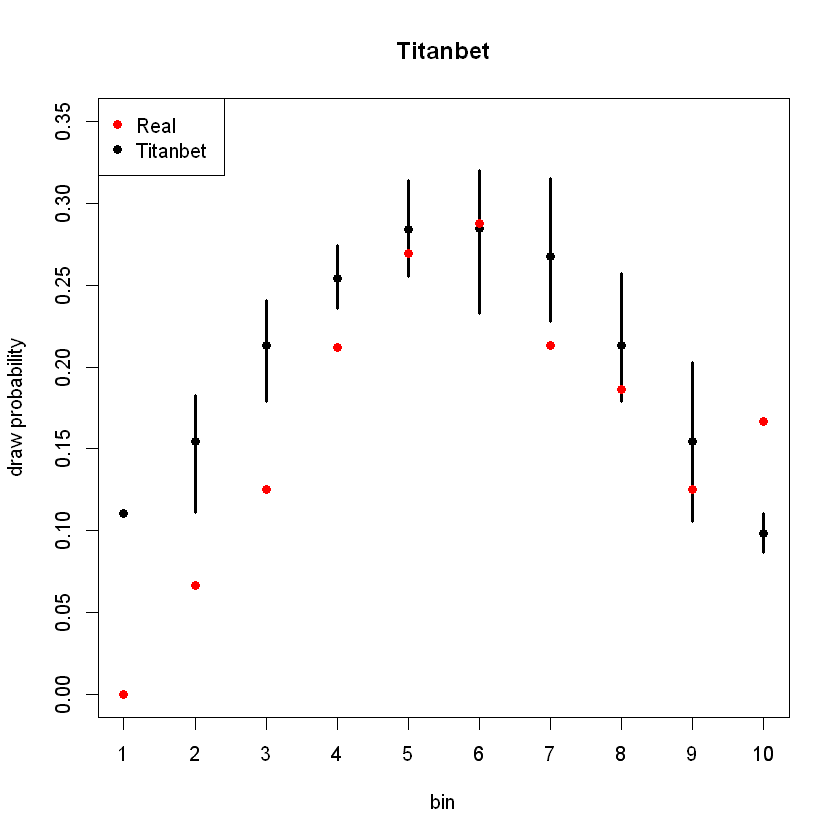

In [27]:
#Real draw probabilities and draw probabilities proposed by Titanbet (min. draw probability, max. draw probability 
#and draw probability from the above frame) for each bin are all plotted. The edges of the black line are the minimum and 
#maximum draw probabilities proposed by Titanbet for that bin and the points are the real and proposed draw probabilities.
#Here, the bins represent the discretization of the p(home) - p(away) values.
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'Titanbet',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","Titanbet"),col=c("red","black"),,pch=c(16,16))

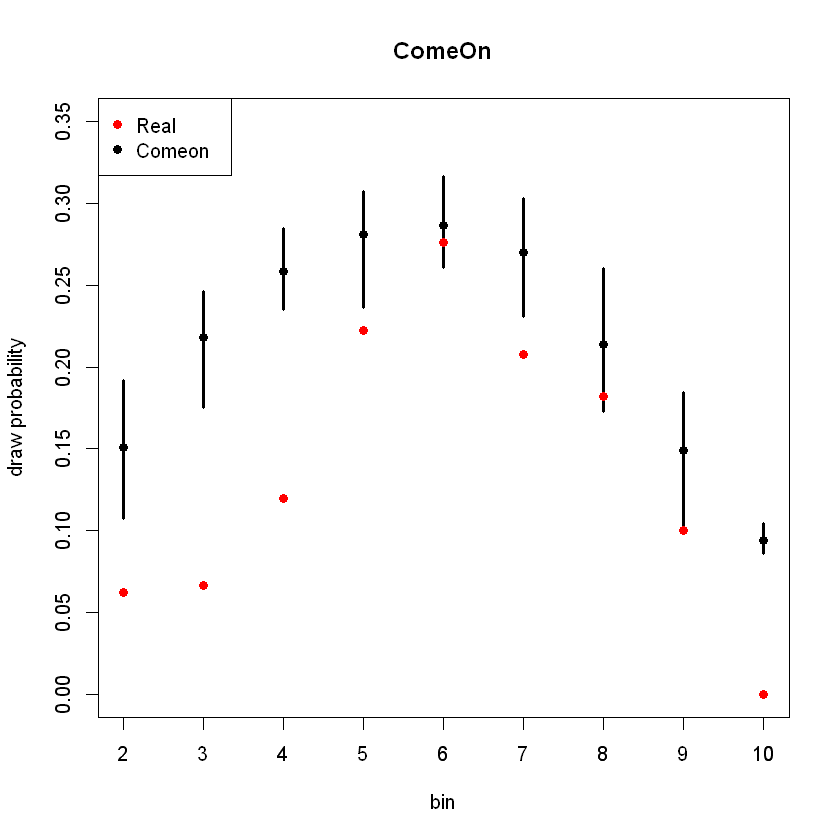

In [28]:
#Let's write the above codes for different bookmakers.
bets_matches_pr_comeon=bets_matches_pr[bets_matches_pr$odd_bookmakers=='ComeOn',]
bets_matches_pr_comeon=bets_matches_pr_comeon[bets_matches_pr_comeon$variable=='odd_1'  | bets_matches_pr_comeon$variable=='odd_x' | bets_matches_pr_comeon$variable=='odd_2' ,]
bets_matches_pr_comeon$variable_probability=1/(as.numeric(as.character(bets_matches_pr_comeon$value)))
frame=bets_matches_pr_comeon %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
bets_matches_pr_comeon=merge(x=bets_matches_pr_comeon,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_comeon['normalised_variable_probability']=bets_matches_pr_comeon['variable_probability'] * (1/bets_matches_pr_comeon['sum_variable_probability'])
bets_matches_pr_comeon_2=bets_matches_pr_comeon
bets_matches_pr_comeon_2=bets_matches_pr_comeon_2[bets_matches_pr_comeon_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_comeon_2)[3]='normalised_variable_t_probability'
bets_matches_pr_comeon=merge(x=bets_matches_pr_comeon,y=bets_matches_pr_comeon_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_comeon_2=bets_matches_pr_comeon[bets_matches_pr_comeon$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_comeon_3=bets_matches_pr_comeon[bets_matches_pr_comeon$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_comeon_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_comeon_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_comeon_2=merge(x=bets_matches_pr_comeon_2,y=bets_matches_pr_comeon_3,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_comeon_2['diff']=bets_matches_pr_comeon_2['normalised_variable_probability1']-bets_matches_pr_comeon_2['normalised_variable_probability2']
bets_matches_pr_comeon_2=bets_matches_pr_comeon_2[,c('match_id','odd_epoch','diff')]
bets_matches_pr_comeon=merge(x=bets_matches_pr_comeon,y=bets_matches_pr_comeon_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_comeon_2=bets_matches_pr_comeon[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_comeon_2=unique(bets_matches_pr_comeon_2)
bets_matches_pr_comeon['bin']=0
bets_matches_pr_comeon$bin <- cut(bets_matches_pr_comeon$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
bets_matches_pr_comeon_3=bets_matches_pr_comeon[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_comeon_3['draw'] = 0
bets_matches_pr_comeon_3['draw'] <- ifelse(bets_matches_pr_comeon_3$match_hometeam_score == bets_matches_pr_comeon_3$match_awayteam_score,1,0)
bets_matches_pr_comeon_3=unique(bets_matches_pr_comeon_3)
bets_matches_pr_comeon_3=na.omit(bets_matches_pr_comeon_3)
frame=bets_matches_pr_comeon_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame=frame[,c(1,4)]
bets_matches_pr_comeon_4=bets_matches_pr_comeon
bets_matches_pr_comeon_4=bets_matches_pr_comeon_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
bets_matches_pr_comeon_4=unique(bets_matches_pr_comeon_4)
frame2=bets_matches_pr_comeon_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'ComeOn',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","Comeon"),col=c("red","black"),,pch=c(16,16))

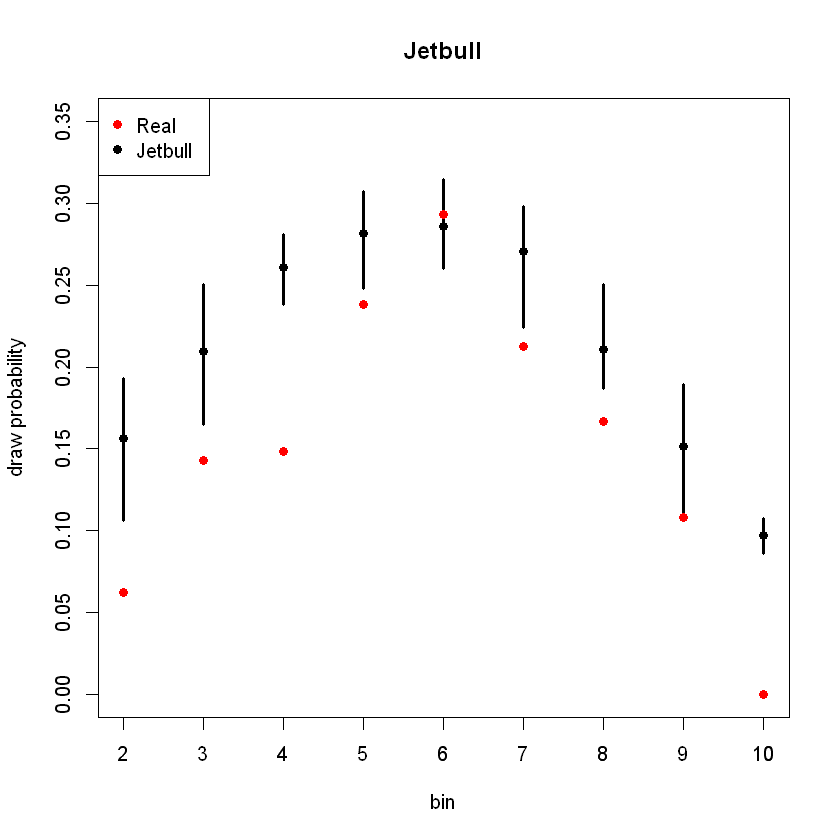

In [29]:
#Let's write the above codes for different bookmakers.
bets_matches_pr_jetbull=bets_matches_pr[bets_matches_pr$odd_bookmakers=='Jetbull',]
bets_matches_pr_jetbull=bets_matches_pr_jetbull[bets_matches_pr_jetbull$variable=='odd_1'  | bets_matches_pr_jetbull$variable=='odd_x' | bets_matches_pr_jetbull$variable=='odd_2' ,]
bets_matches_pr_jetbull$variable_probability=1/(as.numeric(as.character(bets_matches_pr_jetbull$value)))
frame=bets_matches_pr_jetbull %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
bets_matches_pr_jetbull=merge(x=bets_matches_pr_jetbull,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_jetbull['normalised_variable_probability']=bets_matches_pr_jetbull['variable_probability'] * (1/bets_matches_pr_jetbull['sum_variable_probability'])
bets_matches_pr_jetbull_2=bets_matches_pr_jetbull
bets_matches_pr_jetbull_2=bets_matches_pr_jetbull_2[bets_matches_pr_jetbull_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_jetbull_2)[3]='normalised_variable_t_probability'
bets_matches_pr_jetbull=merge(x=bets_matches_pr_jetbull,y=bets_matches_pr_jetbull_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_jetbull_2=bets_matches_pr_jetbull[bets_matches_pr_jetbull$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_jetbull_3=bets_matches_pr_jetbull[bets_matches_pr_jetbull$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_jetbull_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_jetbull_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_jetbull_2=merge(x=bets_matches_pr_jetbull_2,y=bets_matches_pr_jetbull_3,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_jetbull_2['diff']=bets_matches_pr_jetbull_2['normalised_variable_probability1']-bets_matches_pr_jetbull_2['normalised_variable_probability2']
bets_matches_pr_jetbull_2=bets_matches_pr_jetbull_2[,c('match_id','odd_epoch','diff')]
bets_matches_pr_jetbull=merge(x=bets_matches_pr_jetbull,y=bets_matches_pr_jetbull_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_jetbull_2=bets_matches_pr_jetbull[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_jetbull_2=unique(bets_matches_pr_jetbull_2)
bets_matches_pr_jetbull['bin']=0
bets_matches_pr_jetbull$bin <- cut(bets_matches_pr_jetbull$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
bets_matches_pr_jetbull_3=bets_matches_pr_jetbull[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_jetbull_3['draw'] = 0
bets_matches_pr_jetbull_3['draw'] <- ifelse(bets_matches_pr_jetbull_3$match_hometeam_score == bets_matches_pr_jetbull_3$match_awayteam_score,1,0)
bets_matches_pr_jetbull_3=unique(bets_matches_pr_jetbull_3)
bets_matches_pr_jetbull_3=na.omit(bets_matches_pr_jetbull_3)
frame=bets_matches_pr_jetbull_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame=frame[,c(1,4)]
bets_matches_pr_jetbull_4=bets_matches_pr_jetbull
bets_matches_pr_jetbull_4=bets_matches_pr_jetbull_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
bets_matches_pr_jetbull_4=unique(bets_matches_pr_jetbull_4)
frame2=bets_matches_pr_jetbull_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'Jetbull',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","Jetbull"),col=c("red","black"),,pch=c(16,16))

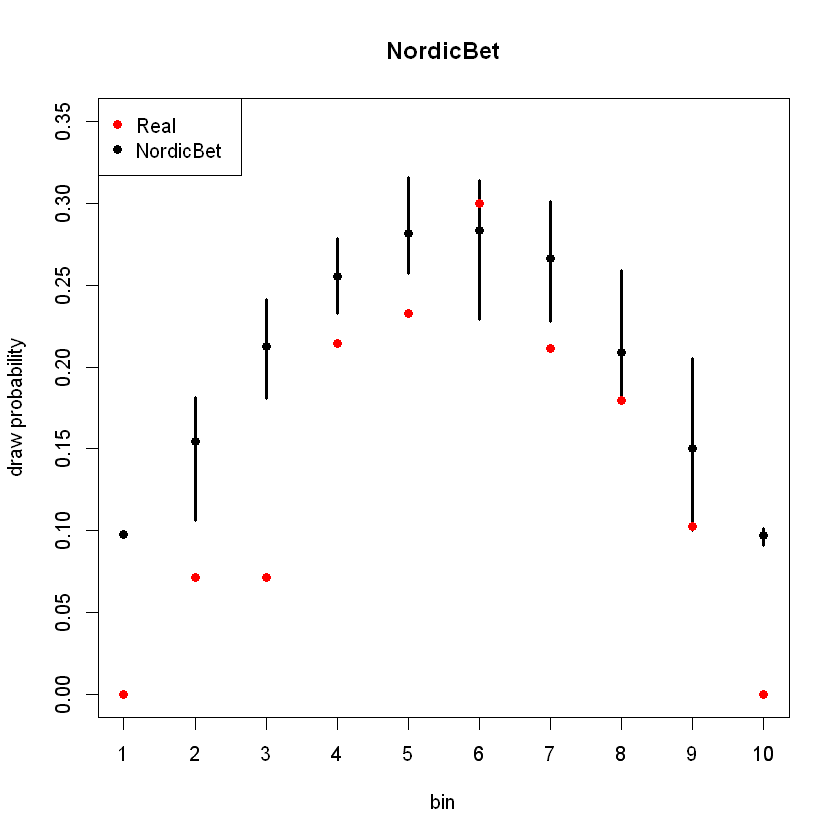

In [30]:
#Let's write the above codes for different bookmakers.
bets_matches_pr_nordicbet=bets_matches_pr[bets_matches_pr$odd_bookmakers=='NordicBet',]
bets_matches_pr_nordicbet=bets_matches_pr_nordicbet[bets_matches_pr_nordicbet$variable=='odd_1'  | bets_matches_pr_nordicbet$variable=='odd_x' | bets_matches_pr_nordicbet$variable=='odd_2' ,]
bets_matches_pr_nordicbet$variable_probability=1/(as.numeric(as.character(bets_matches_pr_nordicbet$value)))
frame=bets_matches_pr_nordicbet %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
bets_matches_pr_nordicbet=merge(x=bets_matches_pr_nordicbet,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_nordicbet['normalised_variable_probability']=bets_matches_pr_nordicbet['variable_probability'] * (1/bets_matches_pr_nordicbet['sum_variable_probability'])
bets_matches_pr_nordicbet_2=bets_matches_pr_nordicbet
bets_matches_pr_nordicbet_2=bets_matches_pr_nordicbet_2[bets_matches_pr_nordicbet_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_nordicbet_2)[3]='normalised_variable_t_probability'
bets_matches_pr_nordicbet=merge(x=bets_matches_pr_nordicbet,y=bets_matches_pr_nordicbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_nordicbet_2=bets_matches_pr_nordicbet[bets_matches_pr_nordicbet$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_nordicbet_3=bets_matches_pr_nordicbet[bets_matches_pr_nordicbet$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_nordicbet_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_nordicbet_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_nordicbet_2=merge(x=bets_matches_pr_nordicbet_2,y=bets_matches_pr_nordicbet_3,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_nordicbet_2['diff']=bets_matches_pr_nordicbet_2['normalised_variable_probability1']-bets_matches_pr_nordicbet_2['normalised_variable_probability2']
bets_matches_pr_nordicbet_2=bets_matches_pr_nordicbet_2[,c('match_id','odd_epoch','diff')]
bets_matches_pr_nordicbet=merge(x=bets_matches_pr_nordicbet,y=bets_matches_pr_nordicbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_nordicbet_2=bets_matches_pr_nordicbet[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_nordicbet_2=unique(bets_matches_pr_nordicbet_2)
bets_matches_pr_nordicbet['bin']=0
bets_matches_pr_nordicbet$bin <- cut(bets_matches_pr_nordicbet$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
bets_matches_pr_nordicbet_3=bets_matches_pr_nordicbet[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_nordicbet_3['draw'] = 0
bets_matches_pr_nordicbet_3['draw'] <- ifelse(bets_matches_pr_nordicbet_3$match_hometeam_score == bets_matches_pr_nordicbet_3$match_awayteam_score,1,0)
bets_matches_pr_nordicbet_3=unique(bets_matches_pr_nordicbet_3)
bets_matches_pr_nordicbet_3=na.omit(bets_matches_pr_nordicbet_3)
frame=bets_matches_pr_nordicbet_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame=frame[,c(1,4)]
bets_matches_pr_nordicbet_4=bets_matches_pr_nordicbet
bets_matches_pr_nordicbet_4=bets_matches_pr_nordicbet_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
bets_matches_pr_nordicbet_4=unique(bets_matches_pr_nordicbet_4)
frame2=bets_matches_pr_nordicbet_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'NordicBet',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","NordicBet"),col=c("red","black"),,pch=c(16,16))

In [31]:
#When we look at our plots we can say that for bin 6 one can potentially make money in the long run by betting on draw because
#in 3 of our 4 plots real draw probability is bigger than average draw probability proposed by bookmaker.
#Bin 6 is when p(home)-p(away) value proposed by bookmaker is between 0 and 0.2.

#In middle bins (around bin 5) absolute value of p(home)-p(away) is small and in bins on the sides (around bin 1 or bin 10)
#absolute value of this difference gets bigger. We also see that when odd_1 and odd_2 are close to each other (in middle bins)
#the probabilities for 3 results (in terms of home, away or draw) become similar to each other and it is around 
#0.3. When odd_1 and odd_2 are not close to each other (in bins on the sides) the probability for draw also 
#becomes smaller. In this case home or away probability becomes dominant and difference between this probability and other
#probabilities increases.


# TASK 3

In [32]:
#We again read goals file entering FALSE argument to stringsAsFactors parameter.
#We also find match_id values for the match if there is a last minute goal (goal time >= 90) and this goal
#changes the result of the match in terms of win, defeat and draw.
goals=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week3/hw1/data/goals.csv', header=TRUE, sep=",",stringsAsFactors = FALSE)
goals$home_score=as.numeric(substr(goals$score,1,1))
goals$away_score=as.numeric(substr(goals$score,5,5))
last_minute_goal_matches=vector()
last_minute_goal_matches=c(last_minute_goal_matches,goals[goals$time >= 90 & goals$home_score==goals$away_score+1 & goals$home_scorer!='','match_id'])
last_minute_goal_matches=c(last_minute_goal_matches,goals[goals$time >= 90 & goals$home_score==goals$away_score-1 & goals$away_scorer!='','match_id'])
last_minute_goal_matches=c(last_minute_goal_matches,goals[goals$time >= 90 & goals$home_score==goals$away_score,'match_id'])

In [33]:
#We print id of these matches. These matches will be excluded.
last_minute_goal_matches

[1]  30338  45369  45363  16498  13296  24554  55248  55266  63306  63572
 [11]  63578  64757  66081  66178  66530  67049  69171  70208  71626  75891
 [21]  78572  79013  81844  83804  87040  79988  89649  91797  94272  98128
 [31] 117246 134633 141497 142906 144692 115600 161896 165761 169660 173510
 [41] 176969 176832 182205 184191 185687 186982 192018 193190 193203 193206
 [51] 194567 194894 198470 203854 208233 209358 211331 214328 218084 227466
 [61] 228773 231198 278712 276269 276275 278715 231217 261925 228814 278727
 [71] 271135 278746 228840 271144 224497 228855  41181  30305  59101  63001
 [81]  64442  64884  66298  67694  67896  70553  72139  73426  74250  77033
 [91]  77546  79348  81851  89096  92867  96815  98608  98614 111084 119840
[101] 124191 124818 127475 133868 147992 159184 168766 178085 179497 184838
[111] 186348 186626 186639 187728 195349 198153 198614 206183 209577 211334
[121] 213265 216677 278617 224448 271104 271115 227517 243172 228802 271112
[131] 278723 278732 242243 271152  13450  30351  45381  24573  45284  16503
[141]  24569  45363  54214  13402  45356  45263  16479  17633  45255  13278
[151]  45246  58518  59088  62483  63011  63408  66802  66303  67049  67259
[161]  67770  68013  68062  69437  69519  70820  71631  71645  77164  78124
[171]  79929  81778  81844  81847  86312  88134  89096  89629  94770  96789
[181]  96800 116061 124191 124644 125993 128098 130364 130823 131619 133915
[191] 135830 143186 143416 144685 147998 154527 155399 155405 159196 159202
[201] 159830 162318 162845 167637 168766 171046 171739 173765 176241 179623
[211] 182962 183097 184817 184819 186624 186634 187713 187728 188734 193203
[221] 194388 194567 194787 195343 195344 195755 196517 196522 196523 198614
[231] 199870 202231 203680 203799 186627 206122 207187 209207 209357 209572
[241] 213265 218084 251935 231180 231187 261900 231198 231198 271102 224453
[251] 271106 271115 276272 228806 224466 278723 227541 227546 276293 224477
[261] 231235 278731 261950 227555 227560 228840 276294 242228 243208 243211
[271] 243207

In [34]:
#We again read booking file entering FALSE argument to stringsAsFactors parameter.
#We also collect id of matches if there is a red card in first 15 minutes.
booking=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week3/hw1/data/booking.csv', header=TRUE, sep=",",stringsAsFactors = FALSE)
early_red_card_matches=booking[booking$card=='red card' & booking$time<=15,'match_id']

In [35]:
#We print id of these matches. These matches will be excluded.
early_red_card_matches

[1]  13422  62475  68390  79347  81154  91795  83075 135746 145786 146841
[11] 159340 159824 200965 201937 278709 227535 261931

In [36]:
#Premier league matches to exclude are selected and printed. Match number to exclude is also found.
matches_to_exclude=c(last_minute_goal_matches,early_red_card_matches)
matches_pr=matches[matches$league_id==148 & matches$match_status=='Finished','match_id']
matches_to_exclude_pr=vector()
for (i in 1:length(matches_to_exclude)){
    if (matches_to_exclude[i] %in% matches_pr){
        matches_to_exclude_pr=c(matches_to_exclude_pr,matches_to_exclude[i])
    }
}
matches_to_exclude_pr
print(paste("Premier Leauge match number to exclude is ",length(unique(matches_to_exclude_pr))))

[1]  13296  55248  63572  66081  67049  94272 182205 193190 208233 224497
[11]  63001  67896  72139  98608  98614 186626 224448  13278  67049  67259
[21]  68013 125993 171046 184817 186624 202231 186627 224453 224466 224477
[31]  13422  83075 200965

[1] "Premier Leauge match number to exclude is  32"


In [37]:
#bets and matches tables are merged again for Premier League matches. Matches to exclude are excluded from this table.
bets_matches=merge(x=bets,y=matches,by='match_id',all.x=TRUE)
bets_matches_pr=bets_matches[bets_matches$league_id==148 & bets_matches$match_status=='Finished',]
bets_matches_pr_2=bets_matches_pr[!(bets_matches_pr$match_id %in% matches_to_exclude_pr),]

In [38]:
#Let's make some analysis. Less number of matches than found above is excluded. The reason for this situation
#is that some matches are not included in bets table and they are not used in our analysis.
print(paste("Number of matches used in analysis before excluding is ",length(unique(bets_matches_pr[,1]))))
print(paste("Number of matches used in analysis after excluding is ",length(unique(bets_matches_pr_2[,1]))))
print(paste("Number of matches excluded because of last minute goal is ",length(unique(intersect(bets_matches_pr[,1],last_minute_goal_matches)))))
print(paste("Number of matches excluded because of early red card is ",length(unique(intersect(bets_matches_pr[,1],early_red_card_matches)))))

[1] "Number of matches used in analysis before excluding is  277"
[1] "Number of matches used in analysis after excluding is  262"
[1] "Number of matches excluded because of last minute goal is  14"
[1] "Number of matches excluded because of early red card is  1"


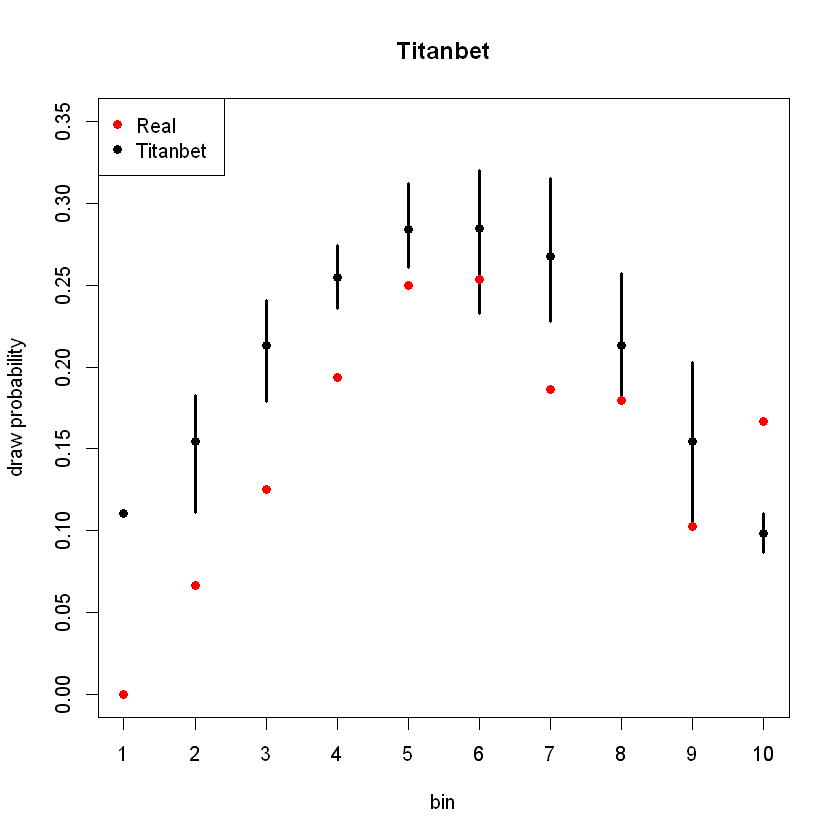

In [39]:
#The obtained table above is used with the same codes written before. Let's start with Titanbet.
bets_matches_pr_2_titanbet=bets_matches_pr_2[bets_matches_pr_2$odd_bookmakers=='Titanbet',]
bets_matches_pr_2_titanbet=bets_matches_pr_2_titanbet[bets_matches_pr_2_titanbet$variable=='odd_1'  | bets_matches_pr_2_titanbet$variable=='odd_x' | bets_matches_pr_2_titanbet$variable=='odd_2' ,]
bets_matches_pr_2_titanbet$variable_probability=1/(as.numeric(as.character(bets_matches_pr_2_titanbet$value)))
frame=bets_matches_pr_2_titanbet %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
bets_matches_pr_2_titanbet=merge(x=bets_matches_pr_2_titanbet,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_titanbet['normalised_variable_probability']=bets_matches_pr_2_titanbet['variable_probability'] * (1/bets_matches_pr_2_titanbet['sum_variable_probability'])
bets_matches_pr_2_titanbet_2=bets_matches_pr_2_titanbet
bets_matches_pr_2_titanbet_2=bets_matches_pr_2_titanbet_2[bets_matches_pr_2_titanbet_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_2_titanbet_2)[3]='normalised_variable_t_probability'
bets_matches_pr_2_titanbet=merge(x=bets_matches_pr_2_titanbet,y=bets_matches_pr_2_titanbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_titanbet_2=bets_matches_pr_2_titanbet[bets_matches_pr_2_titanbet$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_2_titanbet_3=bets_matches_pr_2_titanbet[bets_matches_pr_2_titanbet$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_2_titanbet_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_2_titanbet_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_2_titanbet_2=merge(x=bets_matches_pr_2_titanbet_2,y=bets_matches_pr_2_titanbet_3,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_titanbet_2['diff']=bets_matches_pr_2_titanbet_2['normalised_variable_probability1']-bets_matches_pr_2_titanbet_2['normalised_variable_probability2']
bets_matches_pr_2_titanbet_2=bets_matches_pr_2_titanbet_2[,c('match_id','odd_epoch','diff')]
bets_matches_pr_2_titanbet=merge(x=bets_matches_pr_2_titanbet,y=bets_matches_pr_2_titanbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_titanbet_2=bets_matches_pr_2_titanbet[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_2_titanbet_2=unique(bets_matches_pr_2_titanbet_2)
bets_matches_pr_2_titanbet['bin']=0
bets_matches_pr_2_titanbet$bin <- cut(bets_matches_pr_2_titanbet$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
bets_matches_pr_2_titanbet_3=bets_matches_pr_2_titanbet[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_2_titanbet_3['draw'] = 0
bets_matches_pr_2_titanbet_3['draw'] <- ifelse(bets_matches_pr_2_titanbet_3$match_hometeam_score == bets_matches_pr_2_titanbet_3$match_awayteam_score,1,0)
bets_matches_pr_2_titanbet_3=unique(bets_matches_pr_2_titanbet_3)
bets_matches_pr_2_titanbet_3=na.omit(bets_matches_pr_2_titanbet_3)
frame=bets_matches_pr_2_titanbet_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame=frame[,c(1,4)]
bets_matches_pr_2_titanbet_4=bets_matches_pr_2_titanbet
bets_matches_pr_2_titanbet_4=bets_matches_pr_2_titanbet_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
bets_matches_pr_2_titanbet_4=unique(bets_matches_pr_2_titanbet_4)
frame2=bets_matches_pr_2_titanbet_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'Titanbet',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","Titanbet"),col=c("red","black"),,pch=c(16,16))

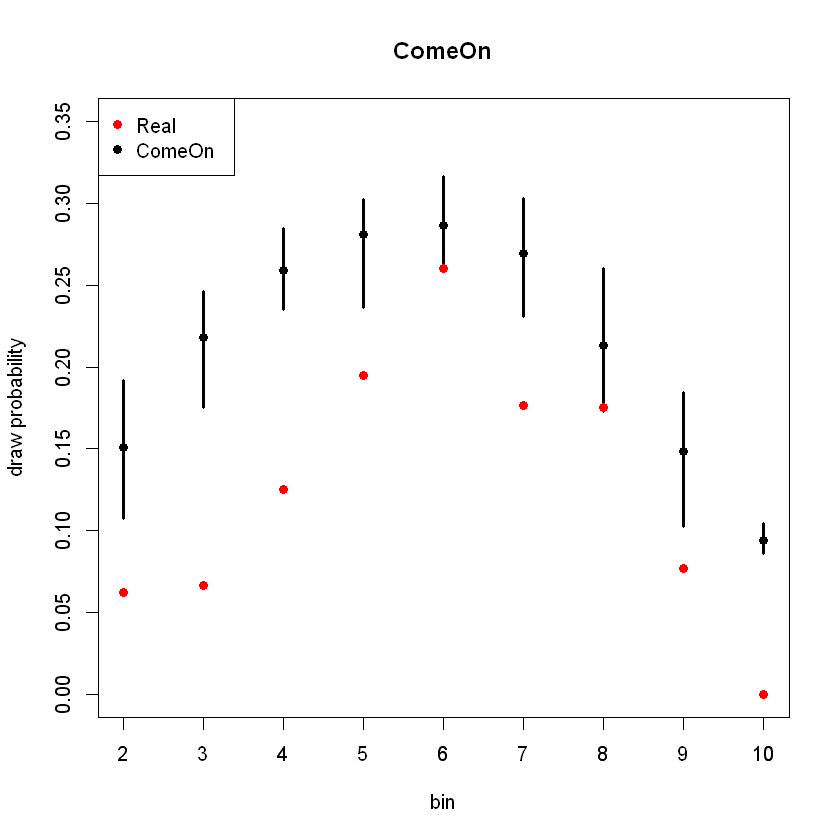

In [40]:
#Let's write the above codes for different bookmakers.
bets_matches_pr_2_comeon=bets_matches_pr_2[bets_matches_pr_2$odd_bookmakers=='ComeOn',]
bets_matches_pr_2_comeon=bets_matches_pr_2_comeon[bets_matches_pr_2_comeon$variable=='odd_1'  | bets_matches_pr_2_comeon$variable=='odd_x' | bets_matches_pr_2_comeon$variable=='odd_2' ,]
bets_matches_pr_2_comeon$variable_probability=1/(as.numeric(as.character(bets_matches_pr_2_comeon$value)))
frame=bets_matches_pr_2_comeon %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
bets_matches_pr_2_comeon=merge(x=bets_matches_pr_2_comeon,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_comeon['normalised_variable_probability']=bets_matches_pr_2_comeon['variable_probability'] * (1/bets_matches_pr_2_comeon['sum_variable_probability'])
bets_matches_pr_2_comeon_2=bets_matches_pr_2_comeon
bets_matches_pr_2_comeon_2=bets_matches_pr_2_comeon_2[bets_matches_pr_2_comeon_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_2_comeon_2)[3]='normalised_variable_t_probability'
bets_matches_pr_2_comeon=merge(x=bets_matches_pr_2_comeon,y=bets_matches_pr_2_comeon_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_comeon_2=bets_matches_pr_2_comeon[bets_matches_pr_2_comeon$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_2_comeon_3=bets_matches_pr_2_comeon[bets_matches_pr_2_comeon$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_2_comeon_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_2_comeon_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_2_comeon_2=merge(x=bets_matches_pr_2_comeon_2,y=bets_matches_pr_2_comeon_3,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_comeon_2['diff']=bets_matches_pr_2_comeon_2['normalised_variable_probability1']-bets_matches_pr_2_comeon_2['normalised_variable_probability2']
bets_matches_pr_2_comeon_2=bets_matches_pr_2_comeon_2[,c('match_id','odd_epoch','diff')]
bets_matches_pr_2_comeon=merge(x=bets_matches_pr_2_comeon,y=bets_matches_pr_2_comeon_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_comeon_2=bets_matches_pr_2_comeon[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_2_comeon_2=unique(bets_matches_pr_2_comeon_2)
bets_matches_pr_2_comeon['bin']=0
bets_matches_pr_2_comeon$bin <- cut(bets_matches_pr_2_comeon$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
bets_matches_pr_2_comeon_3=bets_matches_pr_2_comeon[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_2_comeon_3['draw'] = 0
bets_matches_pr_2_comeon_3['draw'] <- ifelse(bets_matches_pr_2_comeon_3$match_hometeam_score == bets_matches_pr_2_comeon_3$match_awayteam_score,1,0)
bets_matches_pr_2_comeon_3=unique(bets_matches_pr_2_comeon_3)
bets_matches_pr_2_comeon_3=na.omit(bets_matches_pr_2_comeon_3)
frame=bets_matches_pr_2_comeon_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame=frame[,c(1,4)]
bets_matches_pr_2_comeon_4=bets_matches_pr_2_comeon
bets_matches_pr_2_comeon_4=bets_matches_pr_2_comeon_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
bets_matches_pr_2_comeon_4=unique(bets_matches_pr_2_comeon_4)
frame2=bets_matches_pr_2_comeon_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'ComeOn',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","ComeOn"),col=c("red","black"),,pch=c(16,16))

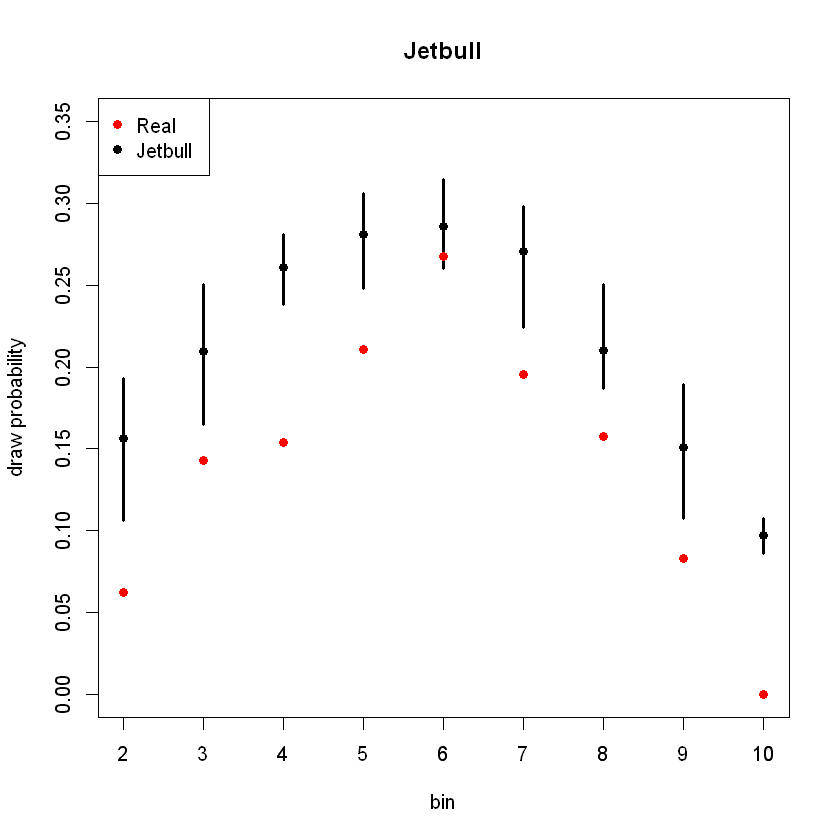

In [41]:
#Let's write the above codes for different bookmakers.
bets_matches_pr_2_jetbull=bets_matches_pr_2[bets_matches_pr_2$odd_bookmakers=='Jetbull',]
bets_matches_pr_2_jetbull=bets_matches_pr_2_jetbull[bets_matches_pr_2_jetbull$variable=='odd_1'  | bets_matches_pr_2_jetbull$variable=='odd_x' | bets_matches_pr_2_jetbull$variable=='odd_2' ,]
bets_matches_pr_2_jetbull$variable_probability=1/(as.numeric(as.character(bets_matches_pr_2_jetbull$value)))
frame=bets_matches_pr_2_jetbull %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
bets_matches_pr_2_jetbull=merge(x=bets_matches_pr_2_jetbull,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_jetbull['normalised_variable_probability']=bets_matches_pr_2_jetbull['variable_probability'] * (1/bets_matches_pr_2_jetbull['sum_variable_probability'])
bets_matches_pr_2_jetbull_2=bets_matches_pr_2_jetbull
bets_matches_pr_2_jetbull_2=bets_matches_pr_2_jetbull_2[bets_matches_pr_2_jetbull_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_2_jetbull_2)[3]='normalised_variable_t_probability'
bets_matches_pr_2_jetbull=merge(x=bets_matches_pr_2_jetbull,y=bets_matches_pr_2_jetbull_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_jetbull_2=bets_matches_pr_2_jetbull[bets_matches_pr_2_jetbull$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_2_jetbull_3=bets_matches_pr_2_jetbull[bets_matches_pr_2_jetbull$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_2_jetbull_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_2_jetbull_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_2_jetbull_2=merge(x=bets_matches_pr_2_jetbull_2,y=bets_matches_pr_2_jetbull_3,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_jetbull_2['diff']=bets_matches_pr_2_jetbull_2['normalised_variable_probability1']-bets_matches_pr_2_jetbull_2['normalised_variable_probability2']
bets_matches_pr_2_jetbull_2=bets_matches_pr_2_jetbull_2[,c('match_id','odd_epoch','diff')]
bets_matches_pr_2_jetbull=merge(x=bets_matches_pr_2_jetbull,y=bets_matches_pr_2_jetbull_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_jetbull_2=bets_matches_pr_2_jetbull[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_2_jetbull_2=unique(bets_matches_pr_2_jetbull_2)
bets_matches_pr_2_jetbull['bin']=0
bets_matches_pr_2_jetbull$bin <- cut(bets_matches_pr_2_jetbull$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
bets_matches_pr_2_jetbull_3=bets_matches_pr_2_jetbull[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_2_jetbull_3['draw'] = 0
bets_matches_pr_2_jetbull_3['draw'] <- ifelse(bets_matches_pr_2_jetbull_3$match_hometeam_score == bets_matches_pr_2_jetbull_3$match_awayteam_score,1,0)
bets_matches_pr_2_jetbull_3=unique(bets_matches_pr_2_jetbull_3)
bets_matches_pr_2_jetbull_3=na.omit(bets_matches_pr_2_jetbull_3)
frame=bets_matches_pr_2_jetbull_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame=frame[,c(1,4)]
bets_matches_pr_2_jetbull_4=bets_matches_pr_2_jetbull
bets_matches_pr_2_jetbull_4=bets_matches_pr_2_jetbull_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
bets_matches_pr_2_jetbull_4=unique(bets_matches_pr_2_jetbull_4)
frame2=bets_matches_pr_2_jetbull_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'Jetbull',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","Jetbull"),col=c("red","black"),,pch=c(16,16))

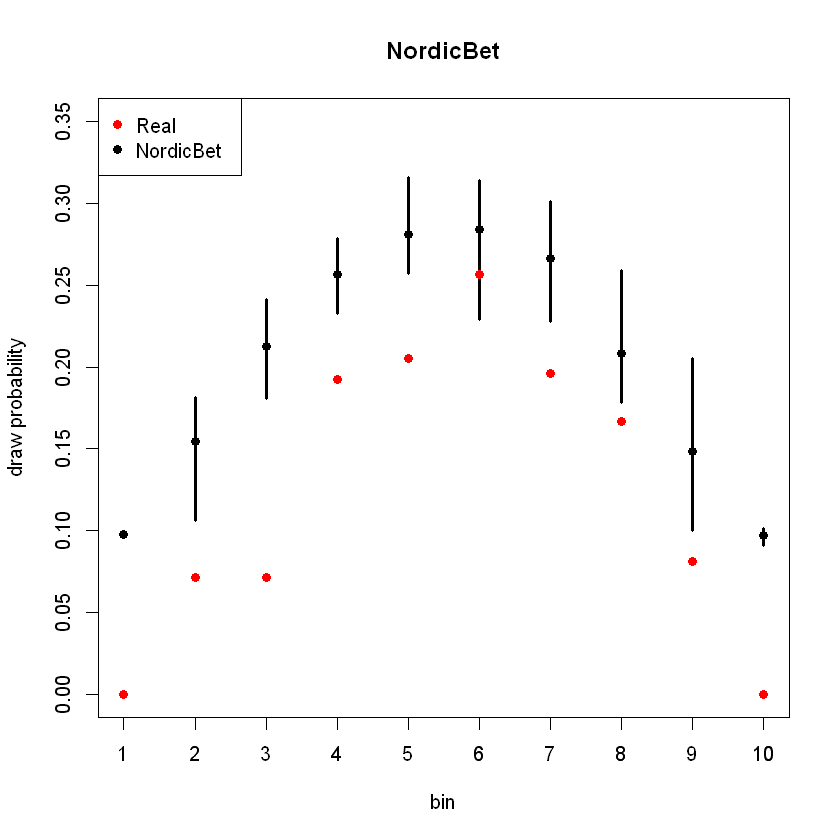

In [42]:
#Let's write the above codes for different bookmakers.
bets_matches_pr_2_nordicbet=bets_matches_pr_2[bets_matches_pr_2$odd_bookmakers=='NordicBet',]
bets_matches_pr_2_nordicbet=bets_matches_pr_2_nordicbet[bets_matches_pr_2_nordicbet$variable=='odd_1'  | bets_matches_pr_2_nordicbet$variable=='odd_x' | bets_matches_pr_2_nordicbet$variable=='odd_2' ,]
bets_matches_pr_2_nordicbet$variable_probability=1/(as.numeric(as.character(bets_matches_pr_2_nordicbet$value)))
frame=bets_matches_pr_2_nordicbet %>% group_by(match_id,odd_epoch) %>% summarise(sum(variable_probability))
names(frame)[3]='sum_variable_probability'
bets_matches_pr_2_nordicbet=merge(x=bets_matches_pr_2_nordicbet,y=frame,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_nordicbet['normalised_variable_probability']=bets_matches_pr_2_nordicbet['variable_probability'] * (1/bets_matches_pr_2_nordicbet['sum_variable_probability'])
bets_matches_pr_2_nordicbet_2=bets_matches_pr_2_nordicbet
bets_matches_pr_2_nordicbet_2=bets_matches_pr_2_nordicbet_2[bets_matches_pr_2_nordicbet_2$variable=='odd_x',c('match_id','odd_epoch','normalised_variable_probability')]
colnames(bets_matches_pr_2_nordicbet_2)[3]='normalised_variable_t_probability'
bets_matches_pr_2_nordicbet=merge(x=bets_matches_pr_2_nordicbet,y=bets_matches_pr_2_nordicbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_nordicbet_2=bets_matches_pr_2_nordicbet[bets_matches_pr_2_nordicbet$variable=='odd_1',c('match_id','odd_epoch','variable','normalised_variable_probability')]
bets_matches_pr_2_nordicbet_3=bets_matches_pr_2_nordicbet[bets_matches_pr_2_nordicbet$variable=='odd_2',c('match_id','odd_epoch','variable','normalised_variable_probability')]
colnames(bets_matches_pr_2_nordicbet_2)[c(3,4)]=c('variable1','normalised_variable_probability1')
colnames(bets_matches_pr_2_nordicbet_3)[c(3,4)]=c('variable2','normalised_variable_probability2')
bets_matches_pr_2_nordicbet_2=merge(x=bets_matches_pr_2_nordicbet_2,y=bets_matches_pr_2_nordicbet_3,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_nordicbet_2['diff']=bets_matches_pr_2_nordicbet_2['normalised_variable_probability1']-bets_matches_pr_2_nordicbet_2['normalised_variable_probability2']
bets_matches_pr_2_nordicbet_2=bets_matches_pr_2_nordicbet_2[,c('match_id','odd_epoch','diff')]
bets_matches_pr_2_nordicbet=merge(x=bets_matches_pr_2_nordicbet,y=bets_matches_pr_2_nordicbet_2,by=c('match_id','odd_epoch'),all.x=TRUE)
bets_matches_pr_2_nordicbet_2=bets_matches_pr_2_nordicbet[,c('match_id','odd_epoch','normalised_variable_t_probability','diff')]
bets_matches_pr_2_nordicbet_2=unique(bets_matches_pr_2_nordicbet_2)
bets_matches_pr_2_nordicbet['bin']=0
bets_matches_pr_2_nordicbet$bin <- cut(bets_matches_pr_2_nordicbet$diff, breaks = c(-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1), 
labels = seq(1,10))
bets_matches_pr_2_nordicbet_3=bets_matches_pr_2_nordicbet[,c('match_id','odd_epoch','match_hometeam_score','match_awayteam_score','normalised_variable_t_probability','diff','bin')]
bets_matches_pr_2_nordicbet_3['draw'] = 0
bets_matches_pr_2_nordicbet_3['draw'] <- ifelse(bets_matches_pr_2_nordicbet_3$match_hometeam_score == bets_matches_pr_2_nordicbet_3$match_awayteam_score,1,0)
bets_matches_pr_2_nordicbet_3=unique(bets_matches_pr_2_nordicbet_3)
bets_matches_pr_2_nordicbet_3=na.omit(bets_matches_pr_2_nordicbet_3)
frame=bets_matches_pr_2_nordicbet_3 %>% group_by(bin) %>% summarise(count=n(),sum(draw))
colnames(frame)[3]='draw'
frame$draw_probability=frame$draw/frame$count
frame=frame[,c(1,4)]
bets_matches_pr_2_nordicbet_4=bets_matches_pr_2_nordicbet
bets_matches_pr_2_nordicbet_4=bets_matches_pr_2_nordicbet_4[,c('match_id','odd_epoch','bin','normalised_variable_t_probability')]
bets_matches_pr_2_nordicbet_4=unique(bets_matches_pr_2_nordicbet_4)
frame2=bets_matches_pr_2_nordicbet_4 %>% group_by(bin) %>% summarise(mean(normalised_variable_t_probability),min(normalised_variable_t_probability),max(normalised_variable_t_probability)) 
colnames(frame2)[2]='draw_probability'
colnames(frame2)[3]='min_draw_probability'
colnames(frame2)[4]='max_draw_probability'
plot(as.vector(frame2$bin),as.vector(frame2$draw_probability),col="black",ylim = c(0,0.35),ylab = 'draw probability',xlab='bin',main = 'NordicBet',pch=16, cex=1)
par(new=TRUE)
segments(x0 = as.numeric(frame2$bin),y0=frame2$min_draw_probability,x1=as.numeric(frame2$bin),y1=frame2$max_draw_probability,lwd=3)
par(new=TRUE)
plot(as.vector(frame$bin),as.vector(frame$draw_probability),col="red",ylim = c(0,0.35),ylab = '',xlab='',pch=16, cex=1)
axis(1,at=1:10)
legend(x = "topleft" , legend = c("Real","NordicBet"),col=c("red","black"),,pch=c(16,16))

In [43]:
#After excluding matches with specific cases, we see that real draw probabilities never passes draw probabilities proposed
#by different bookmakers and difference in bins between real and proposed draw probabilities becomes larger. We see that real
#draw probabilities are always smaller than proposed draw probabilities and one can never make money in the long run by 
#betting on draw after excluding matches with specific cases.
#As a result, we can say that what makes it possible to make money in the long run by betting on draw is specific cases in the
#matches and this is valid only for bin 6. Except this bin, it does not seem possible to make money in the long run
#by betting on draw.